In [1]:
# Practica 1   ofigueroa@ucb.edu.bo


In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

from pandas import Series, DataFrame
from matplotlib import collections as collections
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')
from numpy import median
from numpy import mean

In [34]:
creditos = pd.read_csv('credit-g1.csv',sep=';')
creditos.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,no_checking,24,existing_paid,radio_tv,3430,between_500_1000,>=7,3,male single,none,...,car,31,none,own,1,skilled,2,yes,yes,good
1,no_checking,48,critical_other_existing_credit,education,6110,less_th_100,1<=X<4,1,male single,none,...,no_known_property,31,bank,for_free,1,skilled,1,yes,yes,good
2,no_checking,12,existing_paid,radio_tv,1262,less_th_100,1<=X<4,3,male single,none,...,car,25,none,own,1,skilled,1,none,yes,good
3,no_checking,12,critical_other_existing_credit,radio_tv,618,less_th_100,>=7,4,male single,none,...,real_estate,56,none,own,1,skilled,1,none,yes,good
4,no_checking,24,existing_paid,new_car,1469,between_100_500,>=7,4,male mar_wid,none,...,real_estate,41,none,rent,1,unskilled resident,1,none,yes,good


### 1.	Quitar filas duplicadas

In [36]:
creditos.duplicated().any()  # NO EXISTEN DUPLICADOS EN EL DATASET

False

In [37]:
creditos.drop_duplicates(subset=None, inplace=True)  # APLICANDO LA FUNCION, EL DATASET SE MANTIENE INALTERADO

In [38]:
creditos.columns

Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')

### 2.	Quitar columnas duplicadas

In [40]:
creditosSinCR = creditos.T.drop_duplicates().T
creditos.shape
# NO EXISTEN COLUMNAS REPETIDAS

(50, 21)

### 3. Identificar columnas que tienen valores constantes

In [42]:
def drop_constant_columns(dataframe):
    result = dataframe.copy()
    for column in dataframe.columns:
        if len(dataframe[column].unique()) == 1:
            result = result.drop(column,axis=1)
    return result

In [43]:
creditosSinCK = drop_constant_columns(creditos)
creditosSinCK.shape  # EL DATA SET NO TIENE VALORES CONSTANTES

(50, 21)

### 4.	Identifique el porcentaje de valores faltantes en las columnas

In [45]:
total = creditos.isnull().sum().sort_values(ascending=False)
porcentaje = (creditos.isnull().sum()/creditos.isnull().count()).sort_values(ascending=False)
faltantes = pd.concat([total, porcentaje], axis=1, keys=['Total', 'Porcentaje'])
faltantes  # NO TIENE VALORS FALTANTES

,Total,Porcentaje
checking_status,0,0.0
property_magnitude,0,0.0
foreign_worker,0,0.0
own_telephone,0,0.0
num_dependents,0,0.0
job,0,0.0
existing_credits,0,0.0
housing,0,0.0
other_payment_plans,0,0.0
age,0,0.0


### 5.	Para el dataset hacer un análisis gráfico documentado de las variables:

#### Histogramas

array([[<AxesSubplot:title={'center':'duration'}>,
        <AxesSubplot:title={'center':'credit_amount'}>,
        <AxesSubplot:title={'center':'installment_commitment'}>],
       [<AxesSubplot:title={'center':'residence_since'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'existing_credits'}>],
       [<AxesSubplot:title={'center':'num_dependents'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

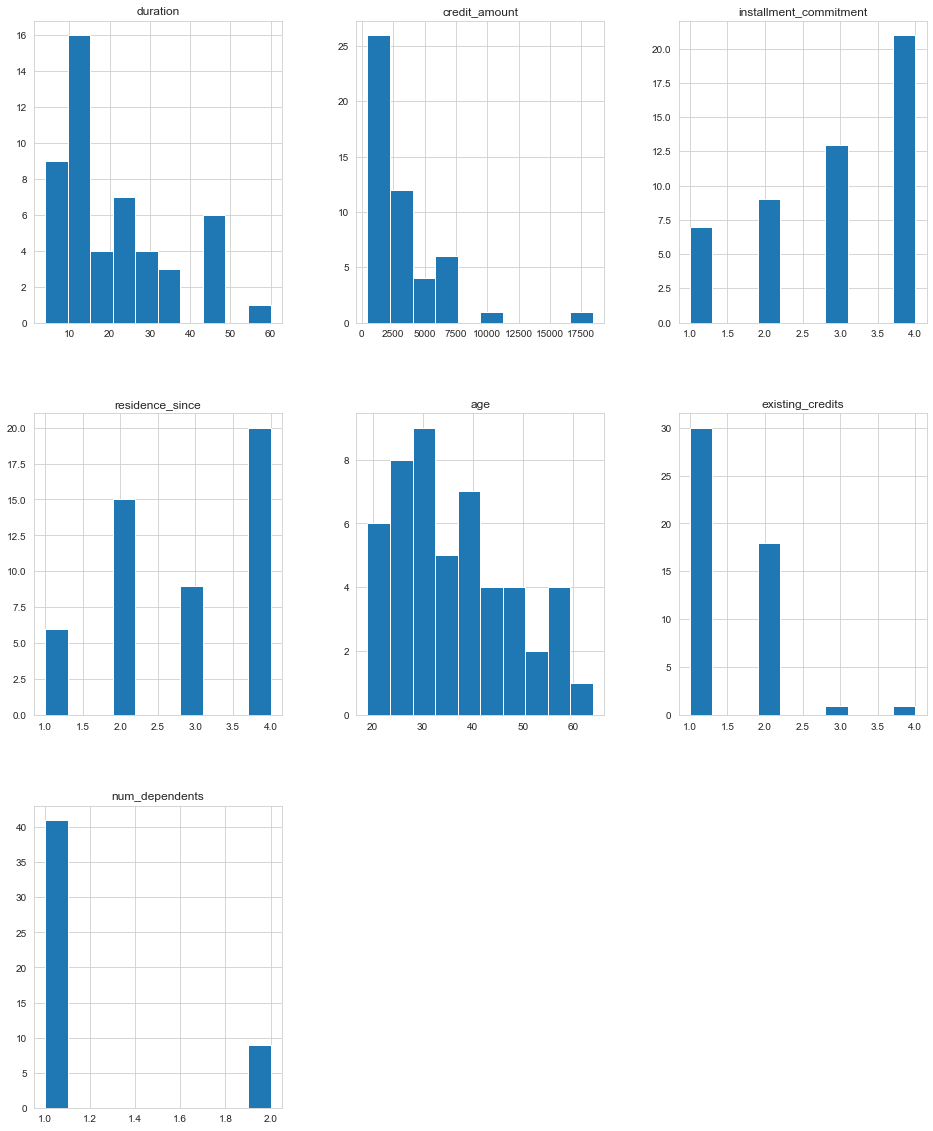

In [54]:
creditos.hist(figsize=(16, 20))

#### ●  Quartiles

<AxesSubplot:xlabel='housing', ylabel='age'>

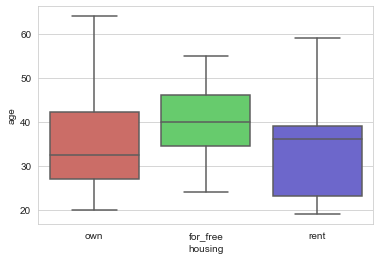

In [55]:
sb.boxplot(x='housing', y='age', data=creditos, palette='hls')

#### ●	Scatter plots


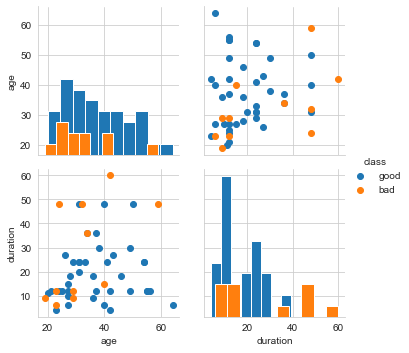

In [63]:
x = sb.PairGrid(creditos, hue='class',vars=['age','duration'])
x = x.map_diag(plt.hist)
x = x.map_offdiag(plt.scatter)
x = x.add_legend()

#### ● Distributions


<AxesSubplot:xlabel='age', ylabel='Density'>

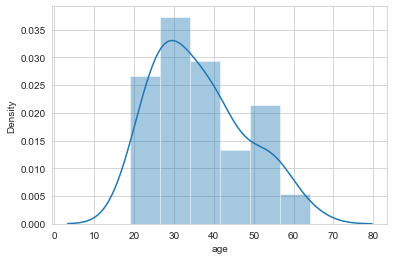

In [64]:
sb.distplot(creditos['age'])

#### ● Boxplots


<AxesSubplot:xlabel='housing', ylabel='age'>

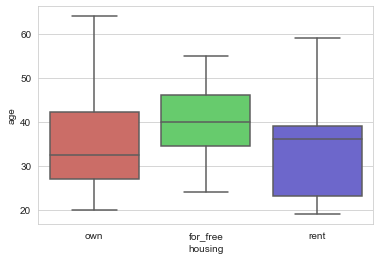

In [65]:
sb.boxplot(x='housing', y='age', data=creditos, palette='hls')

#### ● Bar plot


<AxesSubplot:xlabel='housing', ylabel='age'>

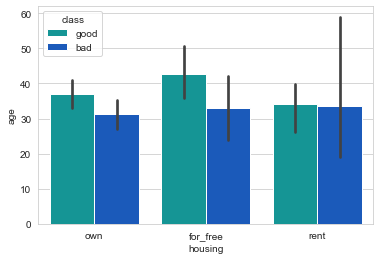

In [67]:
sb.barplot(x='housing', y='age', data=creditos, hue ='class', palette = 'winter_r')

#### ● Heatmaps

<AxesSubplot:xlabel='age', ylabel='class'>

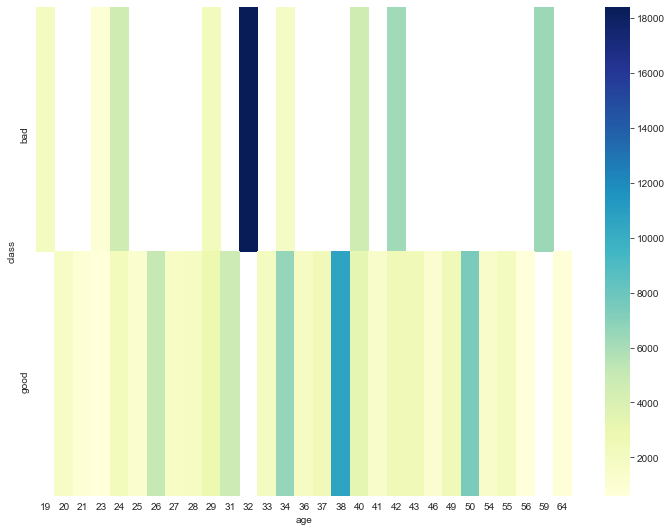

In [72]:
f, ax = plt.subplots(figsize=(12, 9))
creditosHeatMap=creditos[['credit_amount','age','class']]
#sb.heatmap(creditosHeatMap.credit_amount,creditos.duration)
heatmap1_data = pd.pivot_table(creditosHeatMap, values='credit_amount', 
                     index=['class'], 
                     columns='age')
sb.heatmap(heatmap1_data, cmap="YlGnBu")
#bottom, top = ax.get_ylim()
#ax.set_ylim(bottom+0.5, top-0.5)

### 6.	Aplicar expresión matemática para el cálculo (CreditAmount / Duración)*residence_since

In [74]:
creditos['NuevaVariable']=(creditos['credit_amount']/creditos['duration'])*creditos['residence_since']
creditos.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,NuevaVariable
0,no_checking,24,existing_paid,radio_tv,3430,between_500_1000,>=7,3,male single,none,...,31,none,own,1,skilled,2,yes,yes,good,285.833333
1,no_checking,48,critical_other_existing_credit,education,6110,less_th_100,1<=X<4,1,male single,none,...,31,bank,for_free,1,skilled,1,yes,yes,good,381.875000
2,no_checking,12,existing_paid,radio_tv,1262,less_th_100,1<=X<4,3,male single,none,...,25,none,own,1,skilled,1,none,yes,good,210.333333
3,no_checking,12,critical_other_existing_credit,radio_tv,618,less_th_100,>=7,4,male single,none,...,56,none,own,1,skilled,1,none,yes,good,206.000000
4,no_checking,24,existing_paid,new_car,1469,between_100_500,>=7,4,male mar_wid,none,...,41,none,rent,1,unskilled resident,1,none,yes,good,244.833333


In [17]:
# 7.	Discretizar duración, credit_amount, age, number_of_dependents.

In [83]:
# Duration
bins = [0, 20, 40, 70] 
grupos = ['corto', 'mediano', 'largo']
creditos['plazo'] =  pd.cut(creditos['duration'], bins, labels=grupos)
creditos.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,NuevaVariable,plazo,TipoMonto,Edad
0,no_checking,24,existing_paid,radio_tv,3430,between_500_1000,>=7,3,male single,none,...,1,skilled,2,yes,yes,good,285.833333,mediano,minimo,adulto
1,no_checking,48,critical_other_existing_credit,education,6110,less_th_100,1<=X<4,1,male single,none,...,1,skilled,1,yes,yes,good,381.875000,largo,minimo,adulto
2,no_checking,12,existing_paid,radio_tv,1262,less_th_100,1<=X<4,3,male single,none,...,1,skilled,1,none,yes,good,210.333333,corto,minimo,joven
3,no_checking,12,critical_other_existing_credit,radio_tv,618,less_th_100,>=7,4,male single,none,...,1,skilled,1,none,yes,good,206.000000,corto,minimo,adulto mayor
4,no_checking,24,existing_paid,new_car,1469,between_100_500,>=7,4,male mar_wid,none,...,1,unskilled resident,1,none,yes,good,244.833333,mediano,minimo,adulto


In [81]:
# credito amount
bins = [0, 7000, 14000, 20000] 
grupos = ['minimo', 'normal', 'grande']
creditos['TipoMonto'] =  pd.cut(creditos['credit_amount'], bins, labels=grupos)


In [ ]:
# age
bins = [0, 30, 50, 70] 
grupos = ['joven', 'adulto', 'adulto mayor']
creditos['Edad'] =  pd.cut(creditos['age'], bins, labels=grupos)
creditos.head()

In [85]:
# number of dependents
bins = [0,1,2] 
grupos = ['uno', 'dos']
creditos['dependientes'] =  pd.cut(creditos['num_dependents'], bins, labels=grupos)
creditos.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,job,num_dependents,own_telephone,foreign_worker,class,NuevaVariable,plazo,TipoMonto,Edad,dependientes
0,no_checking,24,existing_paid,radio_tv,3430,between_500_1000,>=7,3,male single,none,...,skilled,2,yes,yes,good,285.833333,mediano,minimo,adulto,dos
1,no_checking,48,critical_other_existing_credit,education,6110,less_th_100,1<=X<4,1,male single,none,...,skilled,1,yes,yes,good,381.875000,largo,minimo,adulto,uno
2,no_checking,12,existing_paid,radio_tv,1262,less_th_100,1<=X<4,3,male single,none,...,skilled,1,none,yes,good,210.333333,corto,minimo,joven,uno
3,no_checking,12,critical_other_existing_credit,radio_tv,618,less_th_100,>=7,4,male single,none,...,skilled,1,none,yes,good,206.000000,corto,minimo,adulto mayor,uno
4,no_checking,24,existing_paid,new_car,1469,between_100_500,>=7,4,male mar_wid,none,...,unskilled resident,1,none,yes,good,244.833333,mediano,minimo,adulto,uno


In [18]:
# 8.	Obtenga la matriz de correlación de las variables numéricas.

In [87]:
creditos.corr()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,NuevaVariable
duration,1.000000,0.672019,0.169793,0.184827,0.168262,0.005823,-0.014236,0.009190
credit_amount,0.672019,1.000000,-0.143575,0.028714,0.025455,0.073034,0.043715,0.488800
installment_commitment,0.169793,-0.143575,1.000000,0.271175,0.199536,0.172139,-0.272795,-0.197039
residence_since,0.184827,0.028714,0.271175,1.000000,0.216262,0.180706,0.012565,0.449150
age,0.168262,0.025455,0.199536,0.216262,1.000000,-0.082907,-0.056764,0.007975
existing_credits,0.005823,0.073034,0.172139,0.180706,-0.082907,1.000000,0.314435,0.246643
num_dependents,-0.014236,0.043715,-0.272795,0.012565,-0.056764,0.314435,1.000000,0.209972
NuevaVariable,0.009190,0.488800,-0.197039,0.449150,0.007975,0.246643,0.209972,1.000000


(8.5, -0.5)

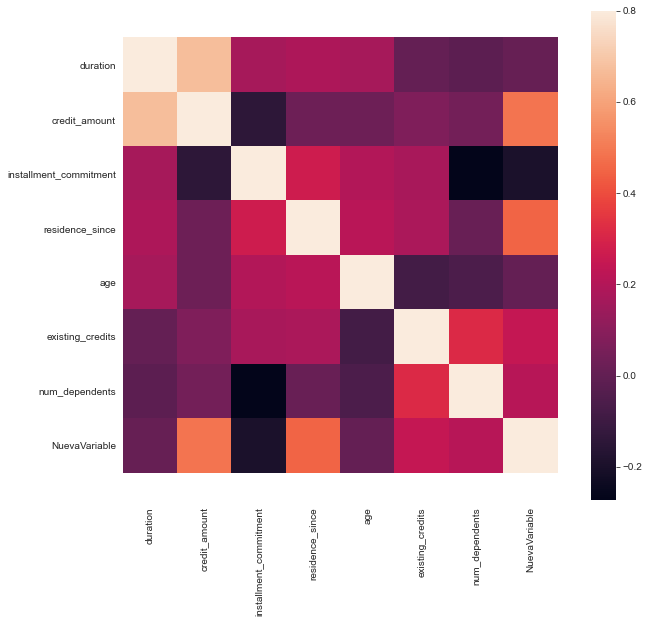

In [88]:
corrmat = creditos.corr()
f, ax = plt.subplots(figsize=(12, 9))
sb.heatmap(corrmat, vmax=.8, square=True);
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

In [19]:
# 9.	Obtenga la tabla de relación de frecuencias entre los atributos job y purpose.

In [118]:
# Two vars
pd.crosstab(index=creditos["job"], 
            columns=creditos["purpose"], margins=True)

purpose,business,education,furniture_equipment,new_car,other,radio_tv,repairs,used_car,All
job,,,,,,,,,
high qualif_self emp_mgmt,1,2,1,1,1,0,0,1,7
skilled,3,3,7,6,0,10,1,3,33
unemp_unskilled non res,0,0,0,0,1,0,0,0,1
unskilled resident,0,0,3,3,0,3,0,0,9
All,4,5,11,10,2,13,1,4,50


In [20]:
# 10.	Mapear a valores diferentes para atributos own_telephone, foreign_worker.

In [89]:
fonodic = {'yes': 1, 'none': 0}
creditos['TelefonoPropio'] = creditos['own_telephone'].map(fonodic)

creditos.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,num_dependents,own_telephone,foreign_worker,class,NuevaVariable,plazo,TipoMonto,Edad,dependientes,TelefonoPropio
0,no_checking,24,existing_paid,radio_tv,3430,between_500_1000,>=7,3,male single,none,...,2,yes,yes,good,285.833333,mediano,minimo,adulto,dos,1
1,no_checking,48,critical_other_existing_credit,education,6110,less_th_100,1<=X<4,1,male single,none,...,1,yes,yes,good,381.875000,largo,minimo,adulto,uno,1
2,no_checking,12,existing_paid,radio_tv,1262,less_th_100,1<=X<4,3,male single,none,...,1,none,yes,good,210.333333,corto,minimo,joven,uno,0
3,no_checking,12,critical_other_existing_credit,radio_tv,618,less_th_100,>=7,4,male single,none,...,1,none,yes,good,206.000000,corto,minimo,adulto mayor,uno,0
4,no_checking,24,existing_paid,new_car,1469,between_100_500,>=7,4,male mar_wid,none,...,1,none,yes,good,244.833333,mediano,minimo,adulto,uno,0


In [90]:
trabajador = {'yes': 1, 'no': 0}
creditos['TrabajorExtranjero'] = creditos['foreign_worker'].map(trabajador)

creditos.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,own_telephone,foreign_worker,class,NuevaVariable,plazo,TipoMonto,Edad,dependientes,TelefonoPropio,TrabajorExtranjero
0,no_checking,24,existing_paid,radio_tv,3430,between_500_1000,>=7,3,male single,none,...,yes,yes,good,285.833333,mediano,minimo,adulto,dos,1,1
1,no_checking,48,critical_other_existing_credit,education,6110,less_th_100,1<=X<4,1,male single,none,...,yes,yes,good,381.875000,largo,minimo,adulto,uno,1,1
2,no_checking,12,existing_paid,radio_tv,1262,less_th_100,1<=X<4,3,male single,none,...,none,yes,good,210.333333,corto,minimo,joven,uno,0,1
3,no_checking,12,critical_other_existing_credit,radio_tv,618,less_th_100,>=7,4,male single,none,...,none,yes,good,206.000000,corto,minimo,adulto mayor,uno,0,1
4,no_checking,24,existing_paid,new_car,1469,between_100_500,>=7,4,male mar_wid,none,...,none,yes,good,244.833333,mediano,minimo,adulto,uno,0,1


In [21]:
# 11.	Normalizar el campo instalment_commitment

In [96]:
campo = ['installment_commitment']

x_array = np.array(creditos['installment_commitment'])
normalized_X = preprocessing.normalize([x_array])
normalized_df = pd.DataFrame(normalized_X.flatten(), columns=campo)
normalized_df.head()

,installment_commitment
0,0.134704
1,0.044901
2,0.134704
3,0.179605
4,0.179605


In [22]:
# 12.	Estandarizar el campo instalment_commitment 

In [98]:
campo = ['installment_commitment']
scaler = preprocessing.StandardScaler()
scaled_df = scaler.fit_transform(creditos[campo])
scaled_df = pd.DataFrame(scaled_df, columns=campo)
scaled_df.head()

,installment_commitment
0,0.037165
1,-1.821071
2,0.037165
3,0.966282
4,0.966282


In [23]:
# 13.	De los gráficos Boxplot obtenidos quitar outliers por medio de Inter-quartil range

In [99]:
def rm_IQR_outliers(df, var):
    q1 = df[var].quantile(.25)
    q3 = df[var].quantile(.75)
    iqr = q3-q1
    h = 3*iqr # originally 1.5
    df.loc[df[var] > q3+h, var] = q3+h
    df.loc[df[var] < q1-h, var] = q1-h

    

In [101]:
creditos.credit_amount.describe()

count       50.000000
mean      3156.920000
std       3093.602812
min        448.000000
25%       1283.250000
50%       2136.000000
75%       3647.000000
max      18424.000000
Name: credit_amount, dtype: float64

In [102]:
rm_IQR_outliers(creditos, 'credit_amount')
creditos.credit_amount.describe()

count       50.000000
mean      3003.205000
std       2441.812464
min        448.000000
25%       1283.250000
50%       2136.000000
75%       3647.000000
max      10738.250000
Name: credit_amount, dtype: float64

In [24]:
# 14.	Utilice One-hot encoding en campo purpose.

In [103]:
columna = ["purpose"]
proposito = pd.get_dummies(creditos, prefix_sep="_",
                              columns=columna)
proposito.head()

,checking_status,duration,credit_history,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,...,TelefonoPropio,TrabajorExtranjero,purpose_business,purpose_education,purpose_furniture_equipment,purpose_new_car,purpose_other,purpose_radio_tv,purpose_repairs,purpose_used_car
0,no_checking,24,existing_paid,3430.0,between_500_1000,>=7,3,male single,none,2,...,1,1,0,0,0,0,0,1,0,0
1,no_checking,48,critical_other_existing_credit,6110.0,less_th_100,1<=X<4,1,male single,none,3,...,1,1,0,1,0,0,0,0,0,0
2,no_checking,12,existing_paid,1262.0,less_th_100,1<=X<4,3,male single,none,2,...,0,1,0,0,0,0,0,1,0,0
3,no_checking,12,critical_other_existing_credit,618.0,less_th_100,>=7,4,male single,none,4,...,0,1,0,0,0,0,0,1,0,0
4,no_checking,24,existing_paid,1469.0,between_100_500,>=7,4,male mar_wid,none,4,...,0,1,0,0,0,1,0,0,0,0


In [25]:
# 15.	Obtenga las instancias que cumplan la condición de un monto de crédito mayor a 3000

In [104]:
creditos[creditos['credit_amount']>3000]

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,own_telephone,foreign_worker,class,NuevaVariable,plazo,TipoMonto,Edad,dependientes,TelefonoPropio,TrabajorExtranjero
0,no_checking,24,existing_paid,radio_tv,3430.00,between_500_1000,>=7,3,male single,none,...,yes,yes,good,285.833333,mediano,minimo,adulto,dos,1,1
1,no_checking,48,critical_other_existing_credit,education,6110.00,less_th_100,1<=X<4,1,male single,none,...,yes,yes,good,381.875000,largo,minimo,adulto,uno,1,1
5,less_th_0,12,critical_other_existing_credit,new_car,3499.00,less_th_100,1<=X<4,3,female div_dep_mar,'co applicant',...,none,yes,bad,583.166667,corto,minimo,joven,uno,0,1
9,no_checking,27,delayed_previously,business,5117.00,less_th_100,4<=X<7,3,male single,none,...,none,yes,good,758.074074,mediano,minimo,joven,uno,0,1
10,less_th_0,30,critical_other_existing_credit,used_car,10623.00,less_th_100,>=7,3,male single,none,...,yes,yes,good,1416.400000,mediano,normal,adulto,dos,1,1
12,less_th_0,48,no_credits_all_paid,used_car,4605.00,less_th_100,>=7,3,male single,none,...,none,yes,bad,383.750000,largo,minimo,joven,dos,0,1
15,between_0_200,48,existing_paid,other,5381.00,no_known_savings,unemployed,3,male single,none,...,yes,yes,good,448.416667,largo,minimo,adulto,uno,1,1
23,less_th_0,36,existing_paid,furniture_equipment,3620.00,less_th_100,1<=X<4,1,male single,guarantor,...,none,yes,good,201.111111,mediano,minimo,adulto,dos,0,1
31,no_checking,15,existing_paid,education,4623.00,between_100_500,1<=X<4,3,male single,none,...,yes,yes,bad,616.400000,corto,minimo,adulto,uno,1,1
32,less_th_0,48,existing_paid,education,7476.00,less_th_100,4<=X<7,4,male single,none,...,yes,yes,good,155.750000,largo,normal,adulto,uno,1,1


In [26]:
# 16.	Obtenga las instancias que cumplen con la condición de que job sea igual a “skilled” y
# que el monto de crédito sea mayor a 2000.

In [110]:
creditos[(creditos['job']=='skilled') & (creditos['credit_amount']>2000)]

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,own_telephone,foreign_worker,class,NuevaVariable,plazo,TipoMonto,Edad,dependientes,TelefonoPropio,TrabajorExtranjero
0,no_checking,24,existing_paid,radio_tv,3430.0,between_500_1000,>=7,3,male single,none,...,yes,yes,good,285.833333,mediano,minimo,adulto,dos,1,1
1,no_checking,48,critical_other_existing_credit,education,6110.0,less_th_100,1<=X<4,1,male single,none,...,yes,yes,good,381.875000,largo,minimo,adulto,uno,1,1
5,less_th_0,12,critical_other_existing_credit,new_car,3499.0,less_th_100,1<=X<4,3,female div_dep_mar,'co applicant',...,none,yes,bad,583.166667,corto,minimo,joven,uno,0,1
9,no_checking,27,delayed_previously,business,5117.0,less_th_100,4<=X<7,3,male single,none,...,none,yes,good,758.074074,mediano,minimo,joven,uno,0,1
12,less_th_0,48,no_credits_all_paid,used_car,4605.0,less_th_100,>=7,3,male single,none,...,none,yes,bad,383.750000,largo,minimo,joven,dos,0,1
21,no_checking,24,critical_other_existing_credit,repairs,2058.0,less_th_100,1<=X<4,4,male div_sep,none,...,yes,yes,good,171.500000,mediano,minimo,adulto,uno,1,1
23,less_th_0,36,existing_paid,furniture_equipment,3620.0,less_th_100,1<=X<4,1,male single,guarantor,...,none,yes,good,201.111111,mediano,minimo,adulto,dos,0,1
25,no_checking,24,existing_paid,new_car,2255.0,no_known_savings,<1,4,male single,none,...,none,yes,good,93.958333,mediano,minimo,adulto mayor,uno,0,1
29,less_th_0,9,critical_other_existing_credit,new_car,2799.0,less_th_100,1<=X<4,2,male single,none,...,none,yes,good,622.000000,corto,minimo,adulto,dos,0,1
34,between_0_200,24,existing_paid,radio_tv,2896.0,between_100_500,<1,2,male single,none,...,none,yes,good,120.666667,mediano,minimo,joven,uno,0,1


In [27]:
# 17.	Obtenga suma total del camp credit_amount agrupado por el campo purpose “new car”.

In [117]:
creditos[['credit_amount','purpose']].groupby('purpose').agg({'credit_amount':'sum'}).reset_index()

,purpose,credit_amount
0,business,15862.00
1,education,24945.00
2,furniture_equipment,21239.00
3,new_car,22752.00
4,other,16119.25
5,radio_tv,24396.00
6,repairs,2058.00
7,used_car,22789.00


In [28]:
# 18.	Obtenga age y class para los registros que tienen campo purpose “education” y housing “for_free”.

In [122]:
creditosAux=creditos[(creditos['purpose']=='education')&(creditos['housing']=='for_free')]
creditosAux[['age','class']]

,age,class
1,31,good
32,50,good
47,42,bad


In [29]:
# 19.	Obtenga el total y el promedio de credit amount agrupado por housing y class.

In [128]:
creditos[['credit_amount','purpose','class']].groupby(['purpose','class']).agg(['sum','mean']).reset_index()

purpose class credit_amount              
                                        sum          mean
0              business   bad       6416.00   6416.000000
1              business  good       9446.00   3148.666667
2             education   bad      11359.00   3786.333333
3             education  good      13586.00   6793.000000
4   furniture_equipment   bad       2939.00   1469.500000
5   furniture_equipment  good      18300.00   2033.333333
6               new_car   bad       5341.00   2670.500000
7               new_car  good      17411.00   2176.375000
8                 other   bad      10738.25  10738.250000
9                 other  good       5381.00   5381.000000
10             radio_tv   bad       1534.00   1534.000000
11             radio_tv  good      22862.00   1905.166667
12              repairs  good       2058.00   2058.000000
13             used_car   bad       4605.00   4605.000000
14             used_car  good      18184.00   6061.333333